# Практикум 1. Введение в Numpy

In [2]:
from math import *
from random import gauss
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 3)

## Сравнение скорости Numpy и чистого Python

Две функции, вычисляющие вероятность того, что броуновское движение превысит уровень $x=1$ на отрезке $t\in[0,1]$ с помощью метода Монте-Карло.

In [16]:
def slow_function(x, m, n):
    sigma = 1/sqrt(n)
    count = 0
    for i in range(m):  # итерация по траекториям
        W = 0
        for j in range(n):  # итерация по времени
            W = W + gauss(0, sigma)
            if W >= x:
                count += 1
                break
    return count/m

def fast_function(x, m, n):
    rng = np.random.default_rng()             # генератор случайных чисел
    dW = rng.normal(0, 1/sqrt(n), size=(n,m)) # приращения броуновского движения
    W = np.cumsum(dW, axis=0)                 # траектории броуновского движения
    return np.mean(np.any(W >= x, axis=0))    # доля траекторий, превысивших 1

In [14]:
# Пример работы функций: вычислим интересующую нас вероятность
# Результаты обеих функций должны быть близки
print(slow_function(1, 10000, 100))
print(fast_function(1, 10000, 100))

0.29
0.2926


In [17]:
# Время работы каждой функции
%timeit slow_function(1, 10000, 100)
%timeit fast_function(1, 10000, 100)

303 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.5 ms ± 94.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Пример: траектории броуновского движения

Сначала нарисуем одну траекторию броуновского движения.

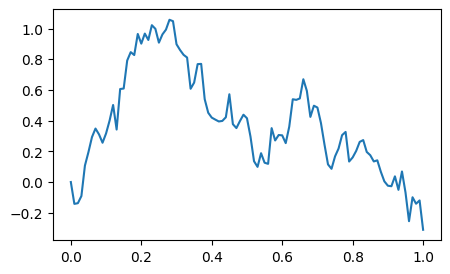

In [5]:
t = 1                                     # Конечный момент времени
n = 100                                   # Количество промежутков в разбиении
T = np.linspace(0, t, n+1)                # Массив точек разбиения
rng = np.random.default_rng()             # Генератор случайных чисел
dW = rng.normal(0, sqrt(t/n), n)          # Приращения броуновского движения
W = np.concatenate(([0], np.cumsum(dW)))  # Вся траектория
# График
plt.plot(T, W);

А теперь нарисуем несколько траекторий геометрического броуновского движения.

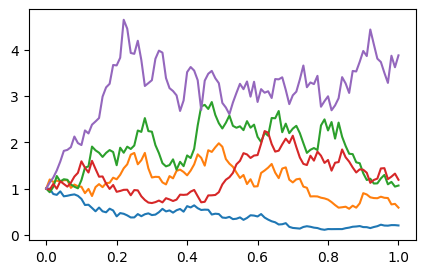

In [10]:
mu = 0
sigma = 1
m = 5

# Приращения всех траекторий броуновского движения со сносом
dX = rng.normal((mu - 0.5*sigma**2)*t/n, sigma*sqrt(t/n), (n, m))  
# Траектории броуновского движения со сносом
X = np.vstack((np.zeros(m), np.cumsum(dX, axis=0)))
# Траектории геометрического броуновского движения
S = np.exp(X)

# Если второй аргумент функции plot является 2-мерным массивом, то считается,
# что каждый столбец представляет собой отдельную функцию
plt.plot(T, S);